# **Kaggle : Data Analysis**

**split the analysis into two parts: one on participants and one on competitions**

Import librairies

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import folium
import requests

Import Data sets

In [16]:
df_competition = pd.read_csv('competitions.raw', sep='\t')
print(df_competition.info())

col_names = ['memberId', 'userName', 'performanceTier', 'competitionsCount', 'soloCompetitionsCount', 'teamCompetitionsCount', 'totalUpvotes', 'totalKernels', 'totalForks' ,'weeklyForks' ,'totalDiscussionsCount','totalTopicsCount', 'totalRepliesCount', 'totalUpvotesCount', 'date_joined', 'occupation', 'location', 'follower_count', 'following_count']
df_users = pd.read_csv('users.raw', sep='\t', header=None, names=col_names)
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 54 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     300 non-null    int64  
 1   id                                             300 non-null    int64  
 2   competitionName                                300 non-null    object 
 3   title                                          300 non-null    object 
 4   briefDescription                               300 non-null    object 
 5   dateEnabled                                    300 non-null    object 
 6   deadline                                       300 non-null    object 
 7   hasLeaderboard                                 281 non-null    object 
 8   leaderboardPercentage                          289 non-null    float64
 9   maxDailySubmissions                            300 non

In [31]:
#Data General Description

df_competition['deadline'] = pd.to_datetime(df_competition['deadline'])
df_competition['dateEnabled'] = pd.to_datetime(df_competition['dateEnabled'])
df_moyenne_duration = df_competition['deadline'] - df_competition['dateEnabled']
print ( 'La durée moyenne des compétitions est : ' , df_moyenne_duration.mean())

moyenne_partipants = df_competition['totalCompetitors'].mean()
variance_partipants = df_competition['totalCompetitors'].var()
print ( 'Le nombre moyen de participants à une compétition est : ', moyenne_partipants )

moyenne_compétition_par_users = df_users['competitionsCount'].mean()
print ( 'Le nombre moyen de compétition par user est : ', moyenne_compétition_par_users )


La durée moyenne des compétitions est :  151 days 10:39:20.514786668
Le nombre moyen de participants à une compétition est :  1483.9175627240143
Le nombre moyen de compétition par user est :  24.529850746268657


**Partie Participants**

**Voici la compétition que nous avons choisi pour analyser les participants d une compétition
voici son Url : " https://www.kaggle.com/competitions/open-problems-single-cell-perturbations "**

In [34]:
#definition de la data pour obtenir des coordonnées geographiques 

import time
from geopy.exc import GeocoderTimedOut

def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    try:
        location = geolocator.geocode(city_name, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None
    except GeocoderTimedOut:
        print(f"Timeout exception for {city_name}. Retrying...")
        time.sleep(random.uniform(1, 3))
        return get_coordinates(city_name)


# Exemple d'utilisation
ville = "Yokohama, Kanagawa, Japan"
coordonnees = get_coordinates(ville)

if coordonnees:
    print(f"Coordonnées de {ville}: Latitude {coordonnees[0]}, Longitude {coordonnees[1]}")
else:
    print(f"Impossible de trouver les coordonnées de {ville}")


Coordonnées de Yokohama, Kanagawa, Japan: Latitude 35.4443947, Longitude 139.6367727


In [65]:
# Obtenez une liste des coordonnées pour chaque ville dans la colonne 'location'

list_coordonnees = []
for city_name in df_users['location']:
    coordonnees = get_coordinates(city_name)
    if coordonnees:
        list_coordonnees.append(coordonnees)
    time.sleep(1)


KeyboardInterrupt: 

**A map is generated from information on participants' locations.**

In [64]:
# Créer une carte centrée sur une position initiale
carte = folium.Map(location=[48.8566, 2.3522], zoom_start=3)

# Ajouter des marqueurs pour chaque paire de coordonnées
for coordonnee in list_coordonnees:
    folium.Marker(coordonnee).add_to(carte)

# Sauvegarder la carte dans un fichier HTML
carte.save('users_carte.html')

**collect and analyze data on the proportion of teams with a single person or several people To see whether people participate more individually or collectively**

Nombre total de competiteur: 353715
Nombre total de competiteur solitaires: 319479
Nombre total d'équipe: 353715
Pourcentage de joueurs solitaires: 90.32102116110427
Pourcentage de joueurs en équipe: 9.678978838895722


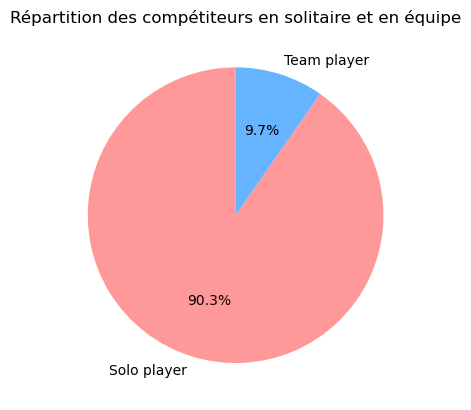

In [55]:
#Obtention des informations sur l'ensemble des équipes de competiteur (sur toutes les competitions)
#On chercher le nombre d'équipe de plusieurs membres, le pourcentage de joueur solitaire, le nombre de compétiteur etc...

cookies = {
    'ka_sessionid': 'b0e152d32858adc6d8a33e8b98433f64',
    '_ga': 'GA1.1.734858222.1701816490',
    'ACCEPTED_COOKIES': 'true',
    'CSRF-TOKEN': 'CfDJ8AQ-xRm-MX9MnWFl6hqVOUw6iHAsWP5VYmm02P57VQtd2PwEw-mUfxEv4lT6SzrWhCW3w0GGUGtdKimqfzHHquYRdHVLaiAjvkbFnQasAg',
    'GCLB': 'CITDuPKjjpL_3AE',
    'build-hash': '74e8395de7b651d3fdc7af569b416949b4cd1ab1',
    'XSRF-TOKEN': 'CfDJ8AQ-xRm-MX9MnWFl6hqVOUztx7e_ZH-6KNcL0e7jW-NjtExAZYN4sCEvjfgksWq4pTo-ppIQuv4vTXETs4JhFs9dx26wgKBlR28VcKcmmY5LdA',
    'CLIENT-TOKEN': 'eyJhbGciOiJub25lIiwidHlwIjoiSldUIn0.eyJpc3MiOiJrYWdnbGUiLCJhdWQiOiJjbGllbnQiLCJzdWIiOm51bGwsIm5idCI6IjIwMjQtMDEtMDRUMTg6MDM6MjguNzIwNzM4MFoiLCJpYXQiOiIyMDI0LTAxLTA0VDE4OjAzOjI4LjcyMDczODBaIiwianRpIjoiZDEwMTk3MTUtZmM3MC00MGU2LWE4OTUtZWMwY2UwYjkyMTlhIiwiZXhwIjoiMjAyNC0wMi0wNFQxODowMzoyOC43MjA3MzgwWiIsImFub24iOnRydWUsImZmIjpbIktlcm5lbHNFeHBvcnRNZXRhZGF0YSIsIktlcm5lbHNGaXJlYmFzZUxvbmdQb2xsaW5nIiwiQ29tbXVuaXR5TG93ZXJIZWFkZXJTaXplcyIsIkNvbXBldGl0aW9uc0ZpbGVzRHJvcEthZ2dsZUFwaSIsIkNvbXBldGl0aW9uTGljZW5zZXMiLCJBbGxvd0ZvcnVtQXR0YWNobWVudHMiLCJGcm9udGVuZEVycm9yUmVwb3J0aW5nIiwiRGF0YXNldHNNYW5hZ2VkRm9jdXNPbk9wZW4iLCJDaGFuZ2VEYXRhc2V0T3duZXJzaGlwVG9PcmciLCJNYXVSZXBvcnQiLCJNb2RlbHNDYWNoZWRUYWdTZXJ2aWNlRW5hYmxlZCIsIk1vZGVsc1RhYk9uQ29tcGV0aXRpb25QYWdlIiwiRGF0YXNldHNTaGFyZWRXaXRoVGhlbVNlYXJjaCIsIkRhdGFzZXRzVm90aW5nQ2hpcHMiLCJSZWNlbnRseVZpZXdlZE1vZGVsc1NoZWxmIiwiTW9kZWxzT3BlblZlcnRleCIsIk1vZGVsc09wZW5WZXJ0ZXhWMiIsIkRhdGFzZXRzRmVlZGJhY2tzRmlsdGVycyIsIkRhdGFzZXRVcGxvYWRlckR1cGxpY2F0ZURldGVjdGlvbiIsIkRhdGFzZXRzRmlsZVVwbG9hZFJhdGVMaW1pdEZhbGxiYWNrIiwiQWN0aXZpdHlTZWN0aW9uUmVkZXNpZ24iXSwiZmZkIjp7Iktlcm5lbEVkaXRvckF1dG9zYXZlVGhyb3R0bGVNcyI6IjMwMDAwIiwiRW1lcmdlbmN5QWxlcnRCYW5uZXIiOiJ7fSIsIkNsaWVudFJwY1JhdGVMaW1pdCI6IjQwIiwiRmVhdHVyZWRDb21tdW5pdHlDb21wZXRpdGlvbnMiOiI2MDA5NSw1NDAwMCw1NzE2MyIsIkFkZEZlYXR1cmVGbGFnc1RvUGFnZUxvYWRUYWciOiJkaXNhYmxlZCIsIlNpbUNvbXBldGl0aW9uSWRzVG9JZ25vcmVVcGxvYWRMaW1pdCI6IjYwMjQzLDYxMjUwIiwiQ29tcGV0aXRpb25NZXRyaWNUaW1lb3V0TWludXRlcyI6IjMwIiwiQ29tcGV0aXRpb25JZHNSZXF1aXJpbmdVc2VyVmVyaWZpY2F0aW9uIjoiNjI3MzMsNjIzOTAiLCJUZkh1YkthZ2dsZUFubm91bmNlbWVudFVybCI6Ii9kaXNjdXNzaW9ucy9wcm9kdWN0LWZlZWRiYWNrLzQ0ODQyNSJ9LCJwaWQiOiJrYWdnbGUtMTYxNjA3Iiwic3ZjIjoid2ViLWZlIiwic2RhayI6IkFJemFTeUE0ZU5xVWRSUnNrSnNDWldWei1xTDY1NVhhNUpFTXJlRSIsImJsZCI6Ijc0ZTgzOTVkZTdiNjUxZDNmZGM3YWY1NjliNDE2OTQ5YjRjZDFhYjEifQ.',
    '_ga_T7QHS60L4Q': 'GS1.1.1704390486.17.1.1704391425.0.0.0',
}

headers = {
    'authority': 'www.kaggle.com',
    'accept': 'application/json',
    'accept-language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7',
    'content-type': 'application/json',
    #'cookie': 'ka_sessionid=b0e152d32858adc6d8a33e8b98433f64; _ga=GA1.1.734858222.1701816490; ACCEPTED_COOKIES=true; CSRF-TOKEN=CfDJ8AQ-xRm-MX9MnWFl6hqVOUw6iHAsWP5VYmm02P57VQtd2PwEw-mUfxEv4lT6SzrWhCW3w0GGUGtdKimqfzHHquYRdHVLaiAjvkbFnQasAg; GCLB=CITDuPKjjpL_3AE; build-hash=74e8395de7b651d3fdc7af569b416949b4cd1ab1; XSRF-TOKEN=CfDJ8AQ-xRm-MX9MnWFl6hqVOUztx7e_ZH-6KNcL0e7jW-NjtExAZYN4sCEvjfgksWq4pTo-ppIQuv4vTXETs4JhFs9dx26wgKBlR28VcKcmmY5LdA; CLIENT-TOKEN=eyJhbGciOiJub25lIiwidHlwIjoiSldUIn0.eyJpc3MiOiJrYWdnbGUiLCJhdWQiOiJjbGllbnQiLCJzdWIiOm51bGwsIm5idCI6IjIwMjQtMDEtMDRUMTg6MDM6MjguNzIwNzM4MFoiLCJpYXQiOiIyMDI0LTAxLTA0VDE4OjAzOjI4LjcyMDczODBaIiwianRpIjoiZDEwMTk3MTUtZmM3MC00MGU2LWE4OTUtZWMwY2UwYjkyMTlhIiwiZXhwIjoiMjAyNC0wMi0wNFQxODowMzoyOC43MjA3MzgwWiIsImFub24iOnRydWUsImZmIjpbIktlcm5lbHNFeHBvcnRNZXRhZGF0YSIsIktlcm5lbHNGaXJlYmFzZUxvbmdQb2xsaW5nIiwiQ29tbXVuaXR5TG93ZXJIZWFkZXJTaXplcyIsIkNvbXBldGl0aW9uc0ZpbGVzRHJvcEthZ2dsZUFwaSIsIkNvbXBldGl0aW9uTGljZW5zZXMiLCJBbGxvd0ZvcnVtQXR0YWNobWVudHMiLCJGcm9udGVuZEVycm9yUmVwb3J0aW5nIiwiRGF0YXNldHNNYW5hZ2VkRm9jdXNPbk9wZW4iLCJDaGFuZ2VEYXRhc2V0T3duZXJzaGlwVG9PcmciLCJNYXVSZXBvcnQiLCJNb2RlbHNDYWNoZWRUYWdTZXJ2aWNlRW5hYmxlZCIsIk1vZGVsc1RhYk9uQ29tcGV0aXRpb25QYWdlIiwiRGF0YXNldHNTaGFyZWRXaXRoVGhlbVNlYXJjaCIsIkRhdGFzZXRzVm90aW5nQ2hpcHMiLCJSZWNlbnRseVZpZXdlZE1vZGVsc1NoZWxmIiwiTW9kZWxzT3BlblZlcnRleCIsIk1vZGVsc09wZW5WZXJ0ZXhWMiIsIkRhdGFzZXRzRmVlZGJhY2tzRmlsdGVycyIsIkRhdGFzZXRVcGxvYWRlckR1cGxpY2F0ZURldGVjdGlvbiIsIkRhdGFzZXRzRmlsZVVwbG9hZFJhdGVMaW1pdEZhbGxiYWNrIiwiQWN0aXZpdHlTZWN0aW9uUmVkZXNpZ24iXSwiZmZkIjp7Iktlcm5lbEVkaXRvckF1dG9zYXZlVGhyb3R0bGVNcyI6IjMwMDAwIiwiRW1lcmdlbmN5QWxlcnRCYW5uZXIiOiJ7fSIsIkNsaWVudFJwY1JhdGVMaW1pdCI6IjQwIiwiRmVhdHVyZWRDb21tdW5pdHlDb21wZXRpdGlvbnMiOiI2MDA5NSw1NDAwMCw1NzE2MyIsIkFkZEZlYXR1cmVGbGFnc1RvUGFnZUxvYWRUYWciOiJkaXNhYmxlZCIsIlNpbUNvbXBldGl0aW9uSWRzVG9JZ25vcmVVcGxvYWRMaW1pdCI6IjYwMjQzLDYxMjUwIiwiQ29tcGV0aXRpb25NZXRyaWNUaW1lb3V0TWludXRlcyI6IjMwIiwiQ29tcGV0aXRpb25JZHNSZXF1aXJpbmdVc2VyVmVyaWZpY2F0aW9uIjoiNjI3MzMsNjIzOTAiLCJUZkh1YkthZ2dsZUFubm91bmNlbWVudFVybCI6Ii9kaXNjdXNzaW9ucy9wcm9kdWN0LWZlZWRiYWNrLzQ0ODQyNSJ9LCJwaWQiOiJrYWdnbGUtMTYxNjA3Iiwic3ZjIjoid2ViLWZlIiwic2RhayI6IkFJemFTeUE0ZU5xVWRSUnNrSnNDWldWei1xTDY1NVhhNUpFTXJlRSIsImJsZCI6Ijc0ZTgzOTVkZTdiNjUxZDNmZGM3YWY1NjliNDE2OTQ5YjRjZDFhYjEifQ.; _ga_T7QHS60L4Q=GS1.1.1704390486.17.1.1704391425.0.0.0',
    'origin': 'https://www.kaggle.com',
    'referer': 'https://www.kaggle.com/competitions/open-problems-single-cell-perturbations',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'x-kaggle-build-version': '74e8395de7b651d3fdc7af569b416949b4cd1ab1',
    'x-xsrf-token': 'CfDJ8AQ-xRm-MX9MnWFl6hqVOUztx7e_ZH-6KNcL0e7jW-NjtExAZYN4sCEvjfgksWq4pTo-ppIQuv4vTXETs4JhFs9dx26wgKBlR28VcKcmmY5LdA',
}

id_des_competitions = []
for id in df_competition['id']:
    id_des_competitions.append(id)


nombre_de_joueur_solitaire_total=0 #Nombre total de joueur solitaire dans toutes les competitions
nombre_de_joueur_en_equipe_total=0  #Nombre total de joueur solitaire dans toutes les competitions
nombre_total_déquipe = 0            #Nombre total d'équipe avec plus d'un membre dans toutes les competitions

for competition_id in id_des_competitions:
    json_data = {
        'competitionId': competition_id,
        'leaderboardMode': 'LEADERBOARD_MODE_DEFAULT',
    }

    response = requests.post(
        'https://www.kaggle.com/api/i/competitions.LeaderboardService/GetLeaderboard',
        cookies=cookies,
        headers=headers,
        json=json_data,
    )

    #Si la requête a réussi le code de statut 200
    if response.status_code == 200:
        data = response.json()

        #Vérifions si la clé 'teams' existe dans la réponse
        if 'teams' in data:

            #Extraction la liste des équipes
            teams_list = data['teams']

            #Itération sur chaque équipe
            for team in teams_list:

                #Vérifier si l'équipe a des membres
                if 'teamMembers' in team:
                    nombre_total_déquipe += 1

                    #Avoir le nombre d'équipe qui ont un seul membre
                    if len(team['teamMembers']) == 1:
                        nombre_de_joueur_solitaire_total += 1

                    #Avoir le nombre d'équipe qui ont 2 membres ou plus membres
                    else:
                        nombre_de_joueur_en_equipe_total += 1

    elif response.status_code == 429:
        print(f"La requête a échoué avec le code d'état {response.status_code}. Attendez et réessayez.")
    else:
        print(f"La requête a échoué avec le code d'état {response.status_code}")
        print(response.text)  #Affiche la réponse pour le débogage

    #Pause d'une seconde entre chaque requête pour respecter les limites du taux
    time.sleep(1)

#Les résultats finaux
total_de_joueur = nombre_de_joueur_solitaire_total + nombre_de_joueur_en_equipe_total
pourcentage_joueur_solitaire = nombre_de_joueur_solitaire_total / total_de_joueur * 100
pourcentage_joueur_en_equipe = nombre_de_joueur_en_equipe_total / total_de_joueur * 100

print("Nombre total de competiteur:", total_de_joueur)
print("Nombre total de competiteur solitaires:", nombre_de_joueur_solitaire_total)
print("Nombre total d'équipe:", nombre_total_déquipe)
print("Pourcentage de joueurs solitaires:", pourcentage_joueur_solitaire)
print("Pourcentage de joueurs en équipe:", pourcentage_joueur_en_equipe)

# Les labels pour le camembert
labels = ['Solo player', 'Team player']

# Les données pour le camembert
sizes = [pourcentage_joueur_solitaire, pourcentage_joueur_en_equipe]

# Les couleurs pour chaque section
colors = ['#ff9999', '#66b3ff']

# Créer un camembert
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Ajouter un titre
plt.title('Répartition des compétiteurs en solitaire et en équipe')

# Afficher le camembert
plt.show()

**Most participants take part individually 90% of the time**

**View the years of registration on the participants' platform**

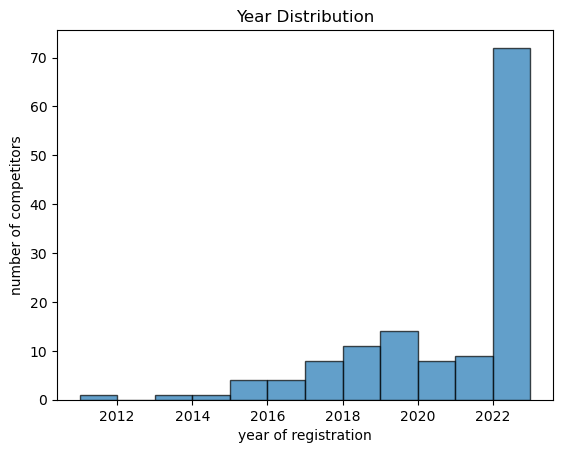

In [69]:
# Importer la classe Timestamp de pandas
from pandas import Timestamp

# Votre liste de Timestamps
L = df_users['date_joined'].tolist()
timestamps = [Timestamp(x) for x in L]
annees = [timestamp.year if isinstance(timestamp, Timestamp) else None for timestamp in timestamps]

# Créer une série sans les valeurs None
annees_clean = [annee for annee in annees if annee is not None]

# Créer un histogramme
plt.hist(annees_clean, bins=range(min(annees_clean), max(annees_clean) + 1), alpha=0.7, edgecolor='black')

plt.title('Year Distribution')
plt.xlabel('year of registration')
plt.ylabel('number of competitors')

plt.show()

**Part 2: Competitions**

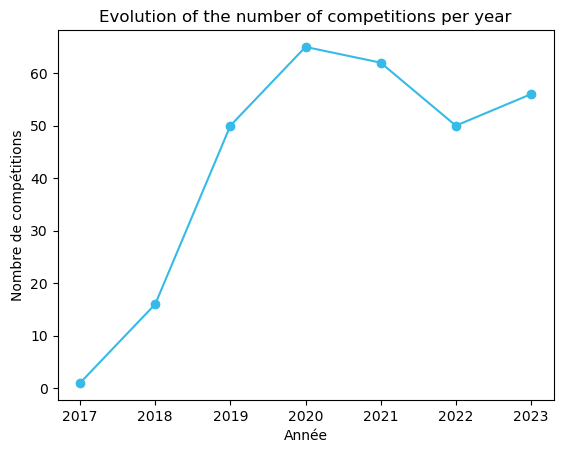

In [71]:
# Convertir la colonne 'dateCreated' en objet datetime
df_competition['dateCreated'] = pd.to_datetime(df_competition['dateCreated'])

# Extraire l'année de la colonne 'dateCreated'
df_competition['annee'] = df_competition['dateCreated'].dt.year

# Tracer le graphique en courbe
plt.plot(df_competition['annee'].value_counts().sort_index().index, df_competition['annee'].value_counts().sort_index(), marker='o', color='#36bae8')

# Ajouter des étiquettes et un titre
plt.xlabel('Année')
plt.ylabel('Nombre de compétitions')
plt.title('Evolution of the number of competitions per year')

# Afficher le graphique
plt.show()


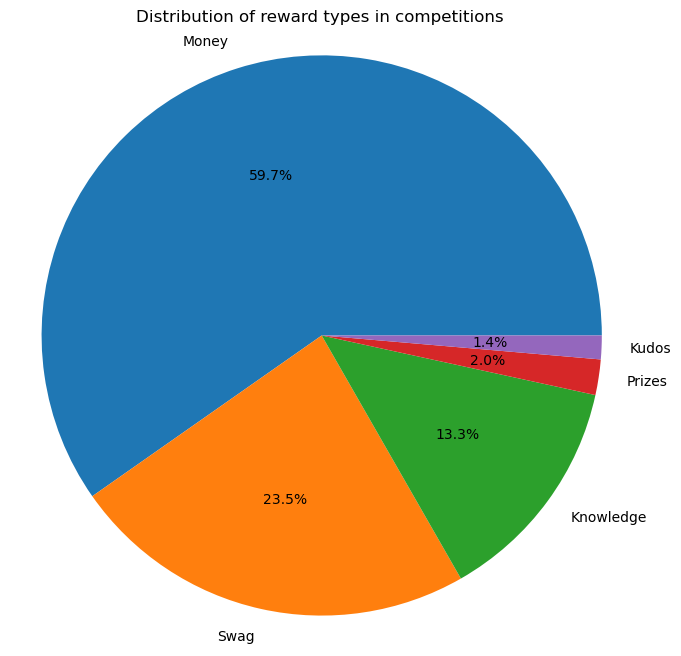

In [36]:
# Compter le nombre de occurrences de chaque rewardTypeId
counts = df_competition['rewardTypeId'].value_counts()

# Afficher le résultat sous forme de camembert
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=['Money', 'Swag', 'Knowledge', 'Prizes', 'Kudos'], autopct='%1.1f%%')
plt.title('Distribution of reward types in competitions')
plt.axis('equal')  # le camembert est un cercle
plt.show()

1.0 : Money
8.0 : Knowledge
6.0 : Swag
2.0 : Kudos
9.0 : Prizes
9.0 : Aussi Knowledge

For 9.0, I found 2 Knowledge, but it's mostly Prizes
Beware, there are many kudos that are without rewardTypeId, and therefore are not taken into account in the pie chart.



**visualize participant behavior according to competition type le comportement de sparticipants selon le type de compétition**

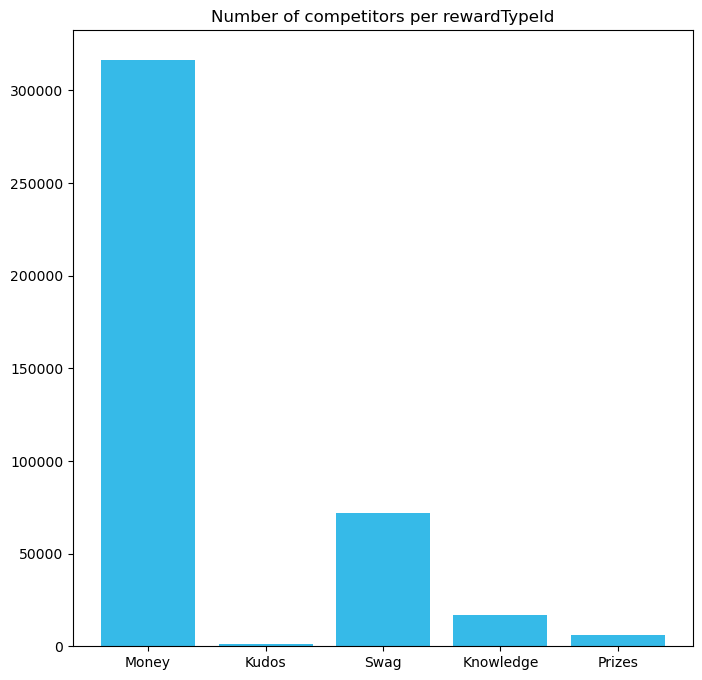

In [37]:
# Compter le nombre de competitors par rewardTypeId
counts = df_competition.groupby('rewardTypeId')['totalCompetitors'].sum()

# Créer un diagramme en bâtons
plt.figure(figsize=(8, 8))
plt.bar(range(5), counts, color='#36bae8', tick_label=['Money', 'Kudos', 'Swag', 'Knowledge', 'Prizes'])
plt.title('Number of competitors per rewardTypeId')
plt.show()


**The number of participants is divided by the number of competitions in each category.**

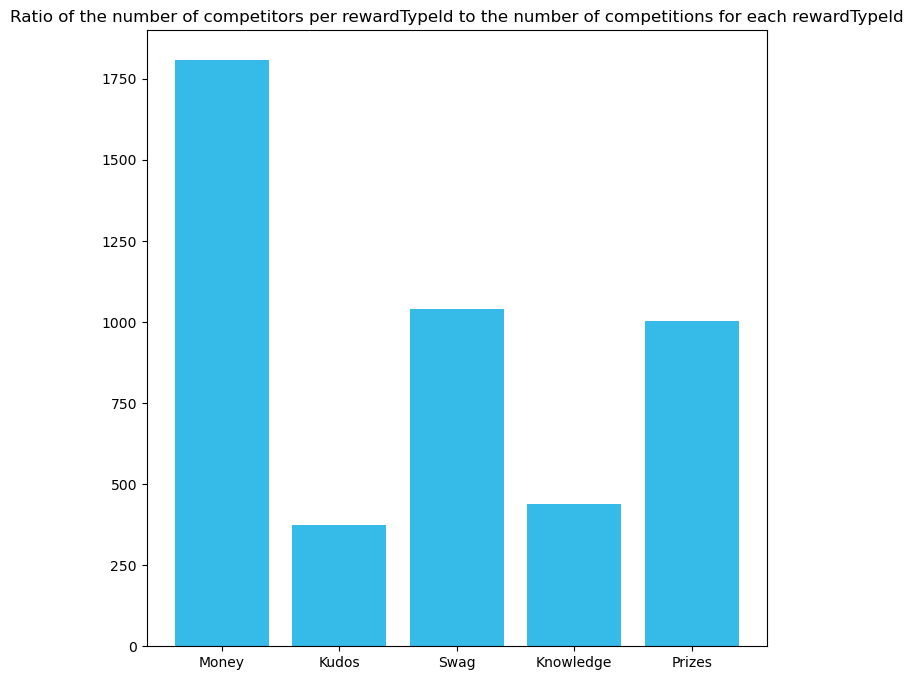

In [61]:
# Calculer le nombre de compétitions pour chaque rewardTypeId
num_competitions = df_competition['rewardTypeId'].value_counts()

# Calculer le nombre de competitors par rewardTypeId
num_competitors = df_competition.groupby('rewardTypeId')['totalCompetitors'].sum()

# Calculer le ratio
ratio = num_competitors / num_competitions

# Créer un diagramme en bâtons
plt.figure(figsize=(8, 8))
plt.bar(range(5), ratio, color='#36bae8', tick_label=['Money', 'Kudos', 'Swag', 'Knowledge', 'Prizes'])
plt.title('Ratio of the number of competitors per rewardTypeId to the number of competitions for each rewardTypeId')
plt.show()

**We can clearly see that competitions with cash rewards generate more participants, followed by SWAG competitions and then Prizes competitions.**

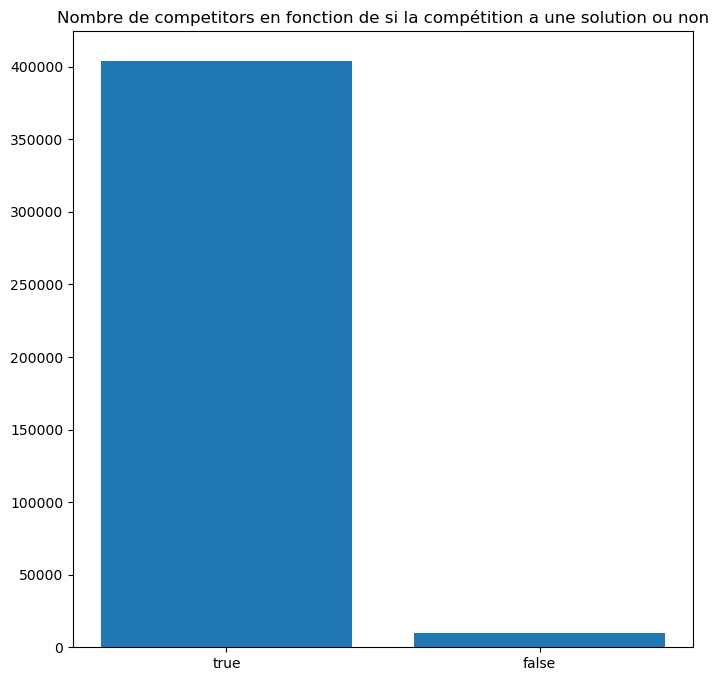

In [39]:
# Compter le nombre de competitors quand hasSolution = true
counts = df_competition[df_competition['hasSolution'] == True]['totalCompetitors'].sum()

# Compter le nombre de competitors quand hasSolution = false ou qu'il n'y a pas de valeur
counts2 = df_competition[df_competition['hasSolution'] != True]['totalCompetitors'].sum()

# Créer un diagramme en bâtons
plt.figure(figsize=(8, 8))
plt.bar(['true', 'false'], [counts, counts2])
plt.title('Nombre de competitors en fonction de si la compétition a une solution ou non')
plt.show()

To see if this is significant, we look at the proportion of competitions that have a solution compared to all the competitions.

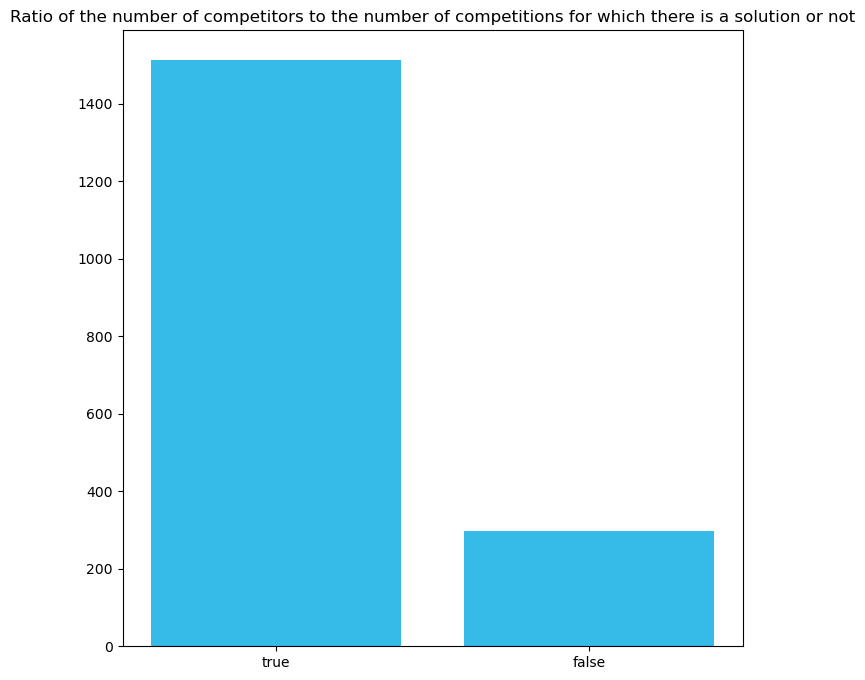

In [41]:
# Compter le nombre de competitors quand il y a une solution
num_competitors_true = df_competition[df_competition['hasSolution'] == True]['totalCompetitors'].sum()

# Compter le nombre de competitors quand il n'y a pas de solution
num_competitors_false = df_competition[df_competition['hasSolution'] != True]['totalCompetitors'].sum()

# Compter le nombre de compétitions pour lesquelles il y a une solution
num_competitions_true = df_competition[df_competition['hasSolution'] == True].shape[0]

# Compter le nombre de compétitions pour lesquelles il n'y a pas de solution
num_competitions_false = df_competition[df_competition['hasSolution'] != True].shape[0]

# Calculer le ratio
ratio_true = num_competitors_true / num_competitions_true
ratio_false = num_competitors_false / num_competitions_false

# Créer un diagramme en bâtons
plt.figure(figsize=(8, 8))
plt.bar(['true', 'false'], [ratio_true, ratio_false], color='#36bae8')
plt.title('Ratio of the number of competitors to the number of competitions for which there is a solution or not')
plt.show()

**We notice that people participate more when there is a solution.n**

**focus on competitions with a financial reward, in this selection we visualize according to the amounts offered**

C:\Users\annah\AppData\Local\Temp\ipykernel_9072\55832447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bucket'], bins = pd.qcut(df2['rewardQuantity'], 4, retbins=True, labels=False)


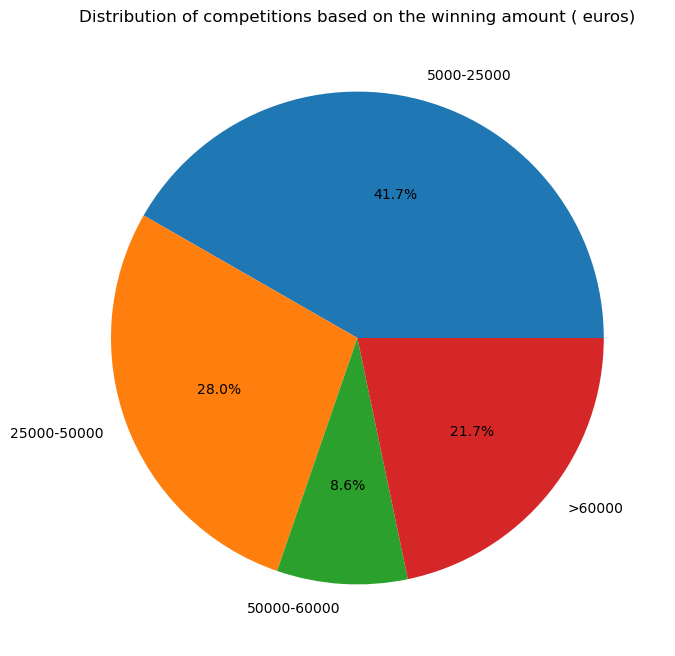

In [58]:
df2 = df_competition[df_competition['rewardTypeId'] == 1]

# Créer une nouvelle colonne 'bucket' qui indique le bucket de chaque compétition
df2['bucket'], bins = pd.qcut(df2['rewardQuantity'], 4, retbins=True, labels=False)

# Compter le nombre de compétitions dans chaque bucket
counts = df2['bucket'].value_counts().sort_index()

# Créer les labels pour les buckets en utilisant les limites
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
labels[-1] = f'>{int(bins[-2])}'  # Le dernier bucket est ouvert à droite

# Camembert
plt.figure(figsize=(8, 8))
plt.pie(counts.values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of competitions based on the winning amount ( euros)')
plt.show()

Competitor participation based on the amount of money to be won

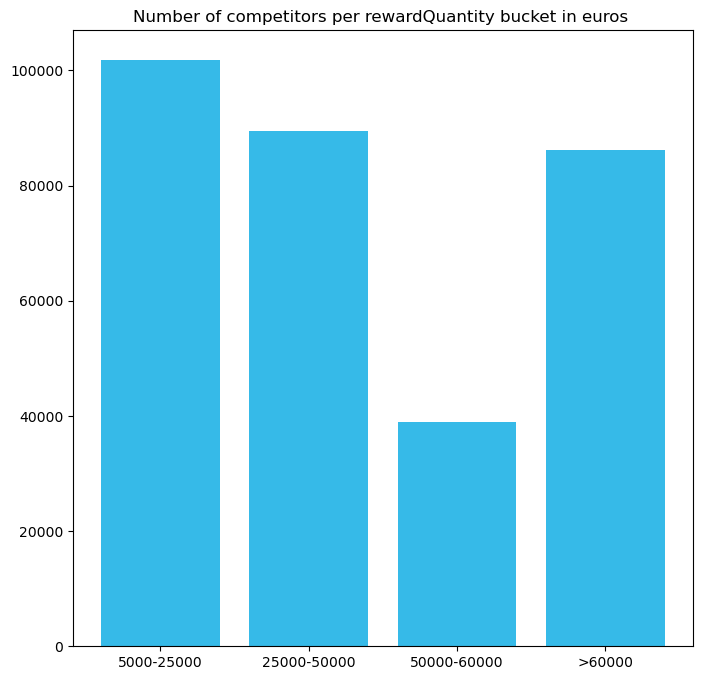

In [62]:
# Somme du nombre de participants dans chaque bucket
competitors_per_bucket = df2.groupby('bucket')['totalCompetitors'].sum()

# Diagramme en bâtons
plt.figure(figsize=(8, 8))
plt.bar(labels, competitors_per_bucket.values, color='#36bae8')
plt.title('Number of competitors per rewardQuantity bucket in euros ')
plt.show()


**The ratio of participants to the number of competitions is calculated as follows**

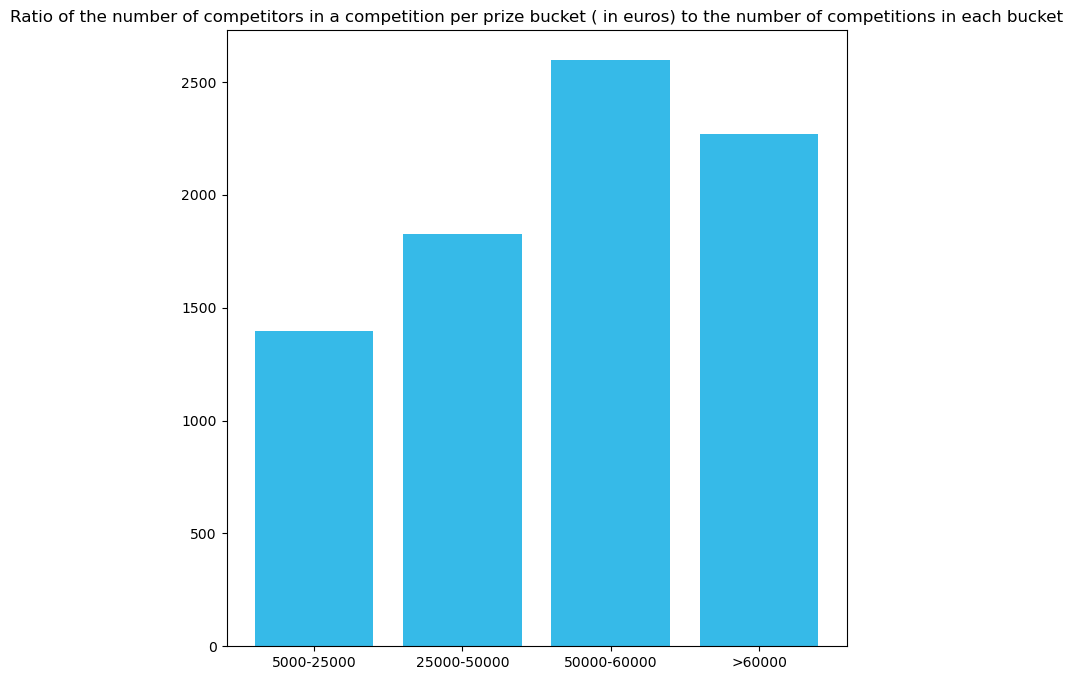

In [63]:
# Compter le nombre de compétitions dans chaque bucket
num_competitions_per_bucket = df2['bucket'].value_counts().sort_index()

# Calculer le ratio
ratio = competitors_per_bucket / num_competitions_per_bucket

# Créer un diagramme en bâtons
plt.figure(figsize=(8, 8))
plt.bar(labels, ratio.values, color='#36bae8')
plt.title('Ratio of the number of competitors in a competition per prize bucket ( in euros) to the number of competitions in each bucket')
plt.show()

People participate more when the price is higher.

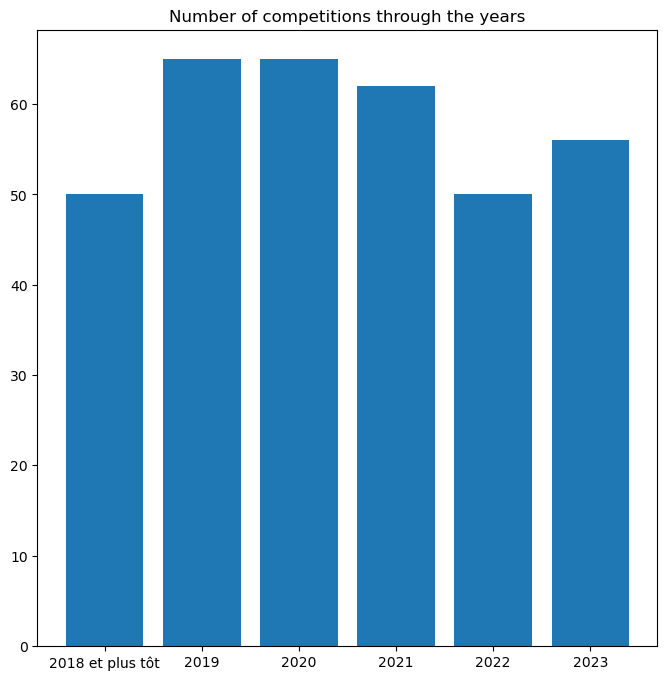

In [46]:
#Répartition en fonction de la date de publication de la compétition:

df_competition['dateCreated'] = pd.to_datetime(df_competition['dateCreated'])

cat1 = df_competition[(df_competition['dateCreated'] >= '2023-01-01')]
counts1 = cat1.shape[0]

cat2 = df_competition[(df_competition['dateCreated'] >= '2022-01-01') & (df_competition['dateCreated'] <= '2022-12-31')]
counts2 = cat2.shape[0]

cat3 = df_competition[(df_competition['dateCreated'] >= '2021-01-01') & (df_competition['dateCreated'] <= '2021-12-31')]
counts3 = cat3.shape[0]

cat4 = df_competition[(df_competition['dateCreated'] >= '2020-01-01') & (df_competition['dateCreated'] <= '2020-12-31')]
counts4 = cat4.shape[0]

cat5 = df_competition[(df_competition['dateCreated'] >= '2019-01-01') & (df_competition['dateCreated'] <= '2019-12-31')]
counts5 = cat4.shape[0]

cat6 = df_competition[df_competition['dateCreated'] <= '2018-12-31']
counts6 = cat5.shape[0]

#diagramme en batons
plt.figure(figsize=(8, 8))
plt.bar(['2018 et plus tôt', '2019', '2020', '2021', '2022', '2023'], [counts6, counts5, counts4, counts3, counts2, counts1])
plt.title('Number of competitions through the years')
plt.show()

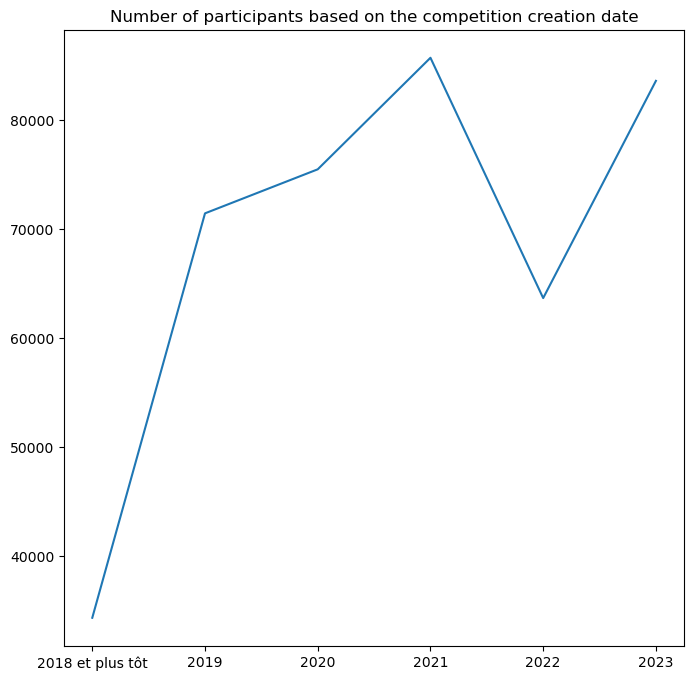

In [48]:
#nombre de participants en fonction de la date de publication des compétitions:

comp1 = cat1['totalCompetitors'].sum()
comp2 = cat2['totalCompetitors'].sum()
comp3 = cat3['totalCompetitors'].sum()
comp4 = cat4['totalCompetitors'].sum()
comp5 = cat5['totalCompetitors'].sum()
comp6 = cat6['totalCompetitors'].sum()

#diagramme en batons
plt.figure(figsize=(8, 8))
plt.plot(['2018 et plus tôt', '2019', '2020', '2021', '2022', '2023'], [comp6, comp5, comp4, comp3,comp2, comp1])
plt.title('Number of participants based on the competition creation date')
plt.show()

   Moyenne de participant par compétition Année de création de la compétition
0                              685.880000                    2018 et plus tôt
1                             1098.538462                                2019
2                             1160.676923                                2020
3                             1381.919355                                2021
4                             1272.580000                                2022
5                             1492.178571                                2023


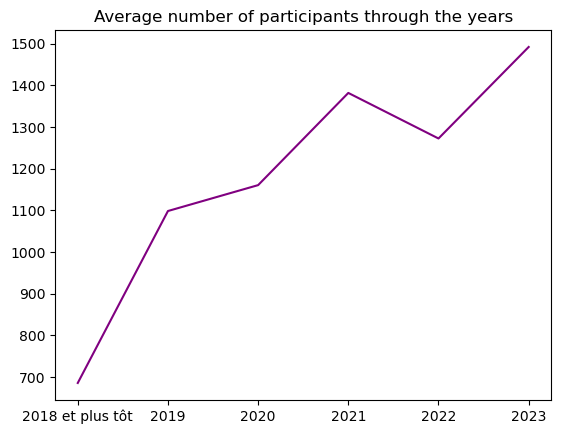

In [49]:
#Calcul de la moyenne de participants par compétition et par an:

# Listes de données
moy = [(comp6/counts6,'2018 et plus tôt'), (comp5/counts5, '2019'), (comp4/counts4, '2020'), (comp3/counts3, '2021'), (comp2/counts2, '2022'), (comp1/counts1, '2023')]

# Création du DataFrame
moydf = pd.DataFrame(moy, columns=['Moyenne de participant par compétition', 'Année de création de la compétition'])

print(moydf)

#Graphe qui montre l'évolution de la moyenne au cours du temps:

plt.plot(['2018 et plus tôt','2019','2020','2021','2022','2023'],moydf['Moyenne de participant par compétition'], color= 'purple')
plt.title('Average number of participants through the years')
plt.show()

1.0    30
6.0    25
8.0     1
Name: rewardTypeId, dtype: int64
1.0    37
6.0     6
8.0     5
Name: rewardTypeId, dtype: int64
1.0    26
6.0    25
8.0     8
9.0     3
Name: rewardTypeId, dtype: int64
1.0    36
8.0    19
6.0     3
9.0     3
Name: rewardTypeId, dtype: int64
1.0    33
6.0     8
8.0     4
2.0     4
Name: rewardTypeId, dtype: int64
1.0    13
8.0     2
6.0     2
Name: rewardTypeId, dtype: int64


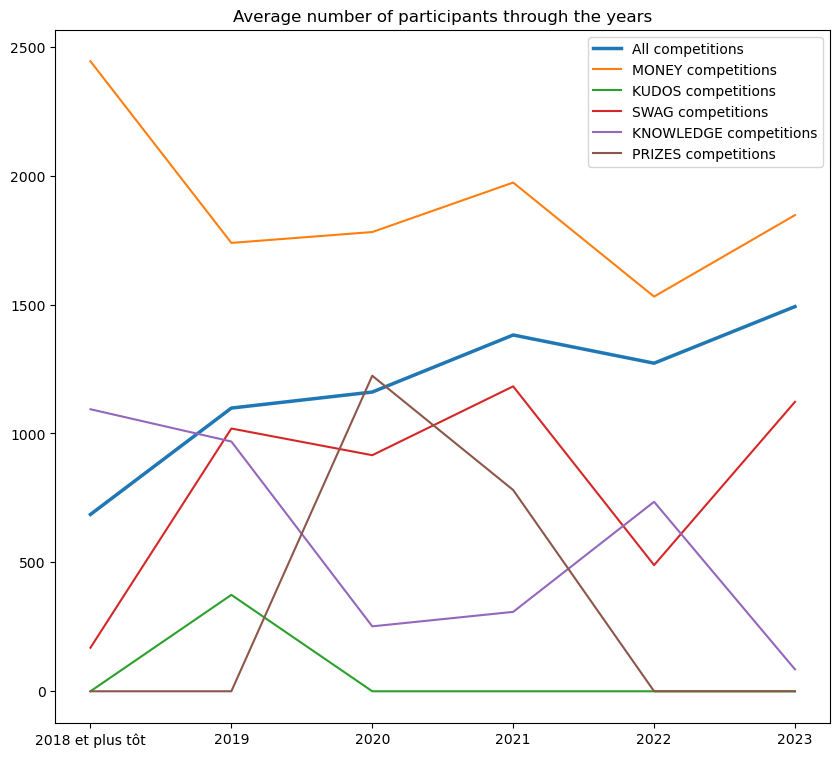

In [50]:
# Compter le nombre de occurrences de chaque rewardTypeId par an:
countcID1 = cat1['rewardTypeId'].value_counts()
countcID2 = cat2['rewardTypeId'].value_counts()
countcID3 = cat3['rewardTypeId'].value_counts()
countcID4 = cat4['rewardTypeId'].value_counts()
countcID5 = cat5['rewardTypeId'].value_counts()
countcID6 = cat6['rewardTypeId'].value_counts()

print(countcID1)
print(countcID2)
print(countcID3)
print(countcID4)
print(countcID5)
print(countcID6)

# Compter le nombre de competitors par rewardTypeId
countpID1 = cat1.groupby('rewardTypeId')['totalCompetitors'].sum()
countpID2 = cat2.groupby('rewardTypeId')['totalCompetitors'].sum()
countpID3 = cat3.groupby('rewardTypeId')['totalCompetitors'].sum()
countpID4 = cat4.groupby('rewardTypeId')['totalCompetitors'].sum()
countpID5 = cat5.groupby('rewardTypeId')['totalCompetitors'].sum()
countpID6 = cat6.groupby('rewardTypeId')['totalCompetitors'].sum()

#Calcul de la moyenne de participants par compétitionID et par an:

# Listes de données ID1:
moy = [(countpID6[1]/countcID6[1],'2018 et plus tôt'), (countpID5[1]/countcID5[1], '2019'), (countpID4[1]/countcID4[1], '2020'), (countpID3[1]/countcID3[1], '2021'), (countpID2[1]/countcID2[1], '2022'), (countpID1[1]/countcID1[1], '2023')]
# Création du DataFrame ID1:
moydfID1 = pd.DataFrame(moy, columns=['Moyenne de participant par compétition ayant l\'ID 1', 'Année de création de la compétition'])

# Listes de données ID2:  
moy = [(0,'2018 et plus tôt'), (countpID5[2]/countcID5[2], '2019'), (0, '2020'), (0, '2021'), (0, '2022'), (0, '2023')]
# Création du DataFrame ID2:
moydfID2 = pd.DataFrame(moy, columns=['Moyenne de participant par compétition ayant l\'ID 2', 'Année de création de la compétition'])

# Listes de données ID6:  
moy = [(countpID6[6]/countcID6[6],'2018 et plus tôt'), (countpID5[6]/countcID5[6], '2019'), (countpID4[6]/countcID4[6], '2020'), (countpID3[6]/countcID3[6], '2021'), (countpID2[6]/countcID2[6], '2022'), (countpID1[6]/countcID1[6], '2023')]
# Création du DataFrame ID6:
moydfID6 = pd.DataFrame(moy, columns=['Moyenne de participant par compétition ayant l\'ID 6', 'Année de création de la compétition'])

# Listes de données ID8:
moy = [(countpID6[8]/countcID6[8],'2018 et plus tôt'), (countpID5[8]/countcID5[8], '2019'), (countpID4[8]/countcID4[8], '2020'), (countpID3[8]/countcID3[8], '2021'), (countpID2[8]/countcID2[8], '2022'), (countpID1[8]/countcID1[8], '2023')]
# Création du DataFrame ID8:
moydfID8 = pd.DataFrame(moy, columns=['Moyenne de participant par compétition ayant l\'ID 8', 'Année de création de la compétition'])

# Listes de données ID9:  
moy = [(0,'2018 et plus tôt'), (0, '2019'), (countpID4[9]/countcID4[9], '2020'), (countpID3[9]/countcID3[9], '2021'), (0, '2022'), (0, '2023')]
# Création du DataFrame ID9:
moydfID9 = pd.DataFrame(moy, columns=['Moyenne de participant par compétition ayant l\'ID 9', 'Année de création de la compétition'])


plt.figure(figsize=(10, 9))

plt.plot(['2018 et plus tôt','2019','2020','2021','2022','2023'],moydf['Moyenne de participant par compétition'], label='All competitions', linewidth=2.5)

plt.plot(['2018 et plus tôt','2019','2020','2021','2022','2023'],moydfID1['Moyenne de participant par compétition ayant l\'ID 1'], label='MONEY competitions')
plt.plot(['2018 et plus tôt','2019','2020','2021','2022','2023'],moydfID2['Moyenne de participant par compétition ayant l\'ID 2'], label='KUDOS competitions')
plt.plot(['2018 et plus tôt','2019','2020','2021','2022','2023'],moydfID6['Moyenne de participant par compétition ayant l\'ID 6'], label='SWAG competitions')
plt.plot(['2018 et plus tôt','2019','2020','2021','2022','2023'],moydfID8['Moyenne de participant par compétition ayant l\'ID 8'], label='KNOWLEDGE competitions')
plt.plot(['2018 et plus tôt','2019','2020','2021','2022','2023'],moydfID9['Moyenne de participant par compétition ayant l\'ID 9'], label='PRIZES competitions')

plt.title('Average number of participants through the years')
plt.legend(loc= 'upper right')
plt.show()